# Primer Punto:

(20%) Implemente una función que dado un vector X y un número de vecinos K, sea capaz de calcular la distancia euclidiana del vector a todos los puntos del espacio de representación y retornar al usuario la posición de los N puntos más cercanos. (Haga uso de la base de datos iris para corroborar el funcionamiento de su función.)

Con la línea de código from Funciones import * se pueden usar todos los recursos existentes en el archivo de Funciones.py en el modelo del archivo Laboratorio_I.ipynb; Todo lo anterior con la finalidad de tener un código más legible y mejor gestión de la memoria.

In [159]:
from main import distancia_euclidiana, vecinos_cercanos, distancias
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer

#Importar la base de datos:
iris_ds = datasets.load_iris()

#Reconocimiento de la base de datos:
print(f'Tamaño de la matriz {iris_ds.data.shape},'
      f' Categorías {iris_ds.target_names},'
      f' Atributos {iris_ds.feature_names}')

#Conversión a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris_ds['data'], iris_ds['target']],
                       columns=iris_ds['feature_names']+['Especies'])
iris_df.head(10)

Tamaño de la matriz (150, 4), Categorías ['setosa' 'versicolor' 'virginica'], Atributos ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Para el contexto de esta base de datos es necesario entender que el sepal o sépalo de una flor es la cápsula inicial que protege los demás elementos de la flor antes de que esta florezca, del mismo modo también está el pétalo, que forma la corola de la flor (las hojas con colores bonitos y llamativos característicos de cualquier flor).

![Partes de una flor (las que nos interesan)](https://i.ytimg.com/vi/GYBko-B13hY/maxresdefault.jpg)

# Exploración inicial de datos:
Para esta sección lo que se hace es hacer una revisión tanto gráfica como analítica de los elementos que están relacionados en la base de datos

In [160]:
#Descripción de los datos en iris_df:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


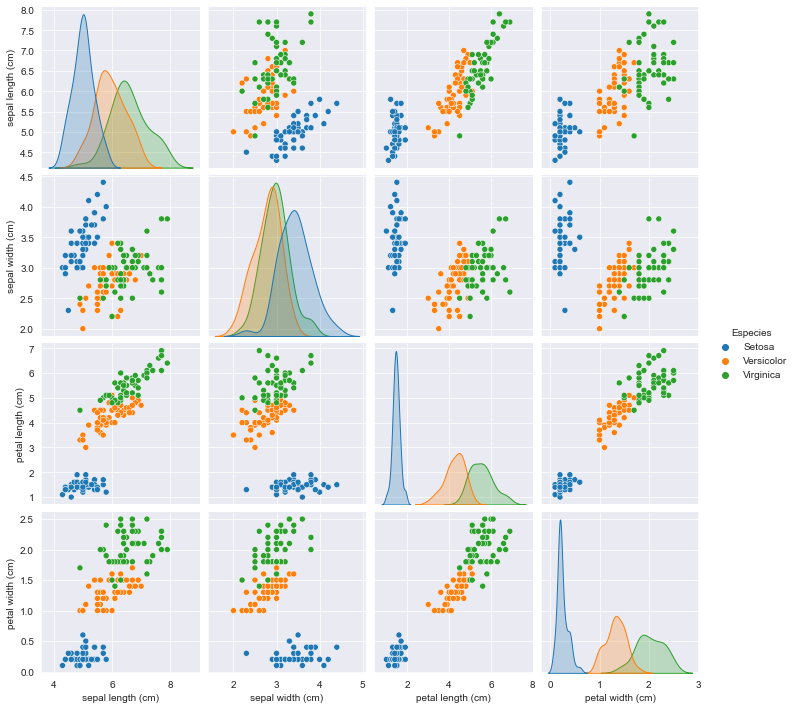

In [161]:
#Graficar los datos con seaborn:

spec = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
sns.pairplot(iris_df.replace({'Especies':spec}), hue='Especies')

Para el scope de este primer punto solo necesitaremos 2 características del DataFrame, se elegirán Virginica y Versicolor

In [162]:
caract = ['petal length (cm)', 'petal width (cm)']
X = iris_df.loc[:, caract]
y = iris_df.loc[:, ['Especies']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Normalizar
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [163]:
K = 3
distancias = distancias(X_train, X_test, K)
print()

Valor del punto de prueba: "petal length (cm): 0.9363291775690445" "petal width (cm): 0.3511234415883917" Sus vecinos más cercanos son (ID | Distancia entre los puntos)             dist
71  0.000000e+00
6   1.241267e-16
87  1.795330e-03
Valor del punto de prueba: "petal length (cm): 0.9922778767136676" "petal width (cm): 0.12403473458920845" Sus vecinos más cercanos son (ID | Distancia entre los puntos)      dist
21    0.0
92    0.0
103   0.0
Valor del punto de prueba: "petal length (cm): 0.9486832980505138" "petal width (cm): 0.31622776601683794" Sus vecinos más cercanos son (ID | Distancia entre los puntos)             dist
88  0.000000e+00
38  5.551115e-17
12  5.464420e-03
Valor del punto de prueba: "petal length (cm): 0.9388763158866086" "petal width (cm): 0.3442546491584232" Sus vecinos más cercanos son (ID | Distancia entre los puntos)         dist
96  0.000600
64  0.001546
63  0.006797
Valor del punto de prueba: "petal length (cm): 0.9486832980505138" "petal width (cm): 0.316227